# In this task you are requested to analyze the top rated moviesand TV shows on IMDB Dataset
1.to find out which genre is the most popular 
2. which director has the most top-rated movies/TV shows.

In [1]:
# Download the IMDB dataset of top 1000 movies and TV shows from Kaggle 
#And load it into a pandas dataframe using the read_csv() function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as t 

In [3]:
Start=t.time()

In [4]:
path = 'C:/Users/EBDA3/Desktop/Data Task/imdb_top_1000.csv'

In [5]:
df_old = pd.read_csv(path)

In [6]:
df_old.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
#Poster_Link ,Released_Year,Certificate,Runtime, Overview ,Meta_score ...ect (not used) 

In [8]:
#coloum used to do the task : Series_Title  ,Genre  ,IMDB_Rating , Director                  

In [9]:
#removing unnecessary columns
df = pd.DataFrame({'Series_Title': df_old['Series_Title'], 'Genre': df_old['Genre'], 'Director':df_old['Director'] , 'IMDB_Rating':df_old['IMDB_Rating']})

df

,Series_Title,Genre,Director,IMDB_Rating
0,The Shawshank Redemption,Drama,Frank Darabont,9.3
1,The Godfather,"Crime, Drama",Francis Ford Coppola,9.2
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,9.0
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,9.0
4,12 Angry Men,"Crime, Drama",Sidney Lumet,9.0
...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,7.6
996,Giant,"Drama, Western",George Stevens,7.6
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,7.6
998,Lifeboat,"Drama, War",Alfred Hitchcock,7.6


In [10]:

df.describe()


,IMDB_Rating
count,1000.000000
mean,7.949300
std,0.275491
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.300000


In [11]:
df.head(100)

,Series_Title,Genre,Director,IMDB_Rating
0,The Shawshank Redemption,Drama,Frank Darabont,9.3
1,The Godfather,"Crime, Drama",Francis Ford Coppola,9.2
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,9.0
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,9.0
4,12 Angry Men,"Crime, Drama",Sidney Lumet,9.0
...,...,...,...,...
95,Amélie,"Comedy, Romance",Jean-Pierre Jeunet,8.3
96,Snatch,"Comedy, Crime",Guy Ritchie,8.3
97,Requiem for a Dream,Drama,Darren Aronofsky,8.3
98,American Beauty,Drama,Sam Mendes,8.3


In [12]:
#Clean and preprocess the data  handling missing values.
#as the output show the coloums i ues don't have missing values to drop 
df.isnull().sum()

Series_Title    0
Genre           0
Director        0
IMDB_Rating     0
dtype: int64

In [13]:
#this instruction show there is no duplicated rows because the num of rows remains 1000 row 
df.drop_duplicates()

,Series_Title,Genre,Director,IMDB_Rating
0,The Shawshank Redemption,Drama,Frank Darabont,9.3
1,The Godfather,"Crime, Drama",Francis Ford Coppola,9.2
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,9.0
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,9.0
4,12 Angry Men,"Crime, Drama",Sidney Lumet,9.0
...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,7.6
996,Giant,"Drama, Western",George Stevens,7.6
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,7.6
998,Lifeboat,"Drama, War",Alfred Hitchcock,7.6


In [14]:
#Explore the data to identify the most popular genre of movies and TV shows using pandas.

popular_genre = df['Genre'].value_counts().idxmax()
print("The most popular genre is:", popular_genre)


The most popular genre is: Drama


In [15]:
#Create a new dataframe containing the count of movies/TV shows in each genre using pandas.

genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Display the new DataFrame
print(genre_counts)

                         Genre  Count
0                        Drama     85
1               Drama, Romance     37
2                Comedy, Drama     35
3       Comedy, Drama, Romance     31
4         Action, Crime, Drama     30
..                         ...    ...
197        Adventure, Thriller      1
198  Animation, Action, Sci-Fi      1
199      Action, Crime, Comedy      1
200  Animation, Crime, Mystery      1
201     Adventure, Comedy, War      1

[202 rows x 2 columns]


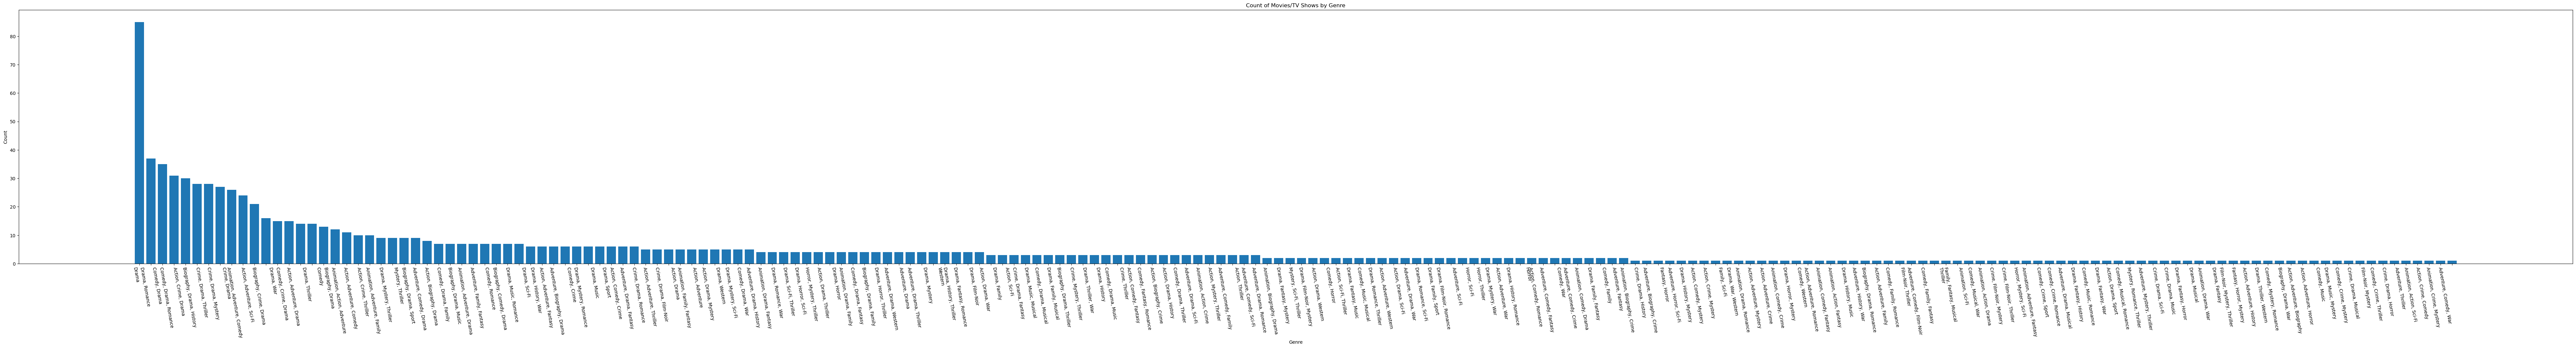

In [16]:
#Visualize the data using a bar chart to show the most popular genre of movies/TV
#shows using pandas and the matplotlib library.

# Plot the bar chart
plt.figure(figsize=(100, 10))  # Set the figure size
plt.bar(genre_counts['Genre'], genre_counts['Count'])  # Plot the bar chart
plt.xlabel('Genre')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Count of Movies/TV Shows by Genre')  # Set the title
plt.xticks(rotation=1000 , ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the chart and zoom please to see 

In [17]:
#Identify the director with the most top-rated movies/TV shows by creating a new dataframe


# Create a new DataFrame with the Average Rating shows directed by each director
director_rate = df.groupby('Director')['IMDB_Rating'].mean().reset_index()
director_rate.columns = ['Director',  'Average Rating']


# Sort the DataFrame by Average Rating the  of movies/TV shows in descending order
director_rate = director_rate.sort_values('Average Rating', ascending=False)

# Display the new DataFrame
print(director_rate)

            Director  Average Rating
141   Frank Darabont            8.95
191   Irvin Kershner            8.70
284   Lana Wachowski            8.70
158     George Lucas            8.60
427  Roberto Benigni            8.60
..               ...             ...
124       Eric Bress            7.60
482        Ted Demme            7.60
350      Neil Burger            7.60
46    Bennett Miller            7.60
315      Mary Harron            7.60

[548 rows x 2 columns]


In [18]:
top_director = director_rate.iloc[0]
top_director_df = pd.DataFrame(top_director).transpose()
top_director_df


,Director,Average Rating
141,Frank Darabont,8.95


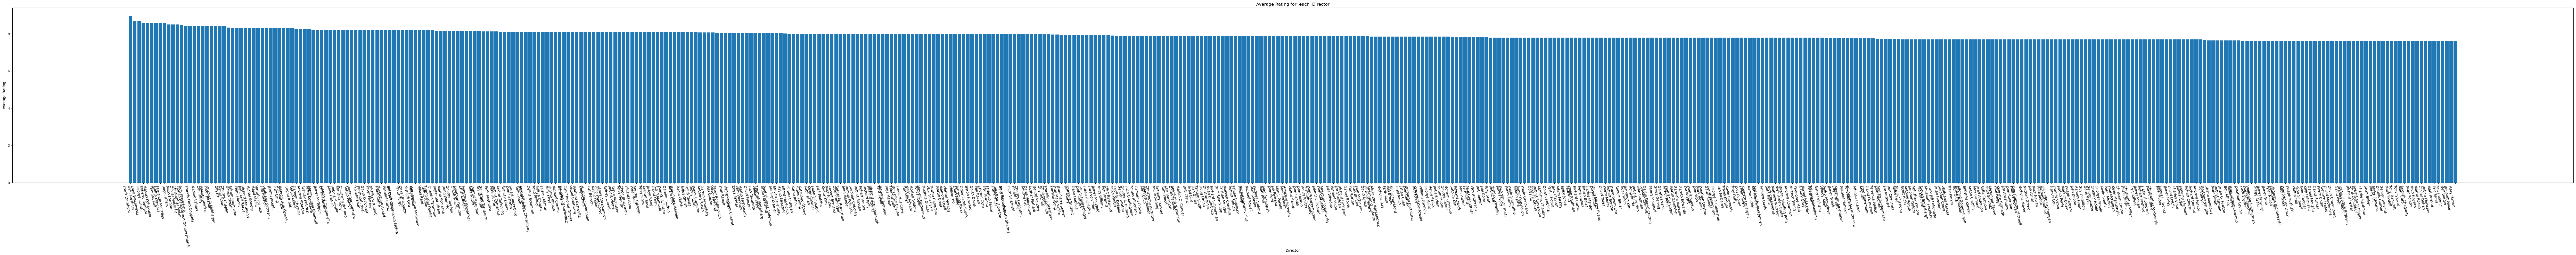

In [19]:
# Plot the bar chart
plt.figure(figsize=(100,10))  # Set the figure size

plt.bar(director_rate['Director'], director_rate['Average Rating'])  # Plot the bar chart

plt.xlabel('Director')  # Set the x-axis label
plt.ylabel('Average Rating')  # Set the y-axis label

plt.title('Average Rating for  each  Director')  # Set the title

plt.xticks(rotation=1000, ha='right')  # Rotate the x-axis labels for better readability

plt.tight_layout()  # Adjust the spacing of the labels and titles

plt.show()  # Display the chart




In [20]:
#containing the count of movies/TV shows directed by each director using pandas.


director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']

# Sort the DataFrame by the count of movies/TV shows in descending order
director_counts = director_counts.sort_values('Count', ascending=False)

# Display the new DataFrame
#sort acording to the num of movies to each director 
print(director_counts)

             Director  Count
0    Alfred Hitchcock     14
1    Steven Spielberg     13
2      Hayao Miyazaki     11
3     Martin Scorsese     10
4      Akira Kurosawa     10
..                ...    ...
311     Jonathan Lynn      1
310         Marc Caro      1
309      David Zucker      1
308       Mark Rydell      1
547    George Stevens      1

[548 rows x 2 columns]


In [21]:
top_directorcount = director_counts.iloc[0]
top_directorcount_df = pd.DataFrame(top_directorcount).transpose()
top_directorcount_df

,Director,Count
0,Alfred Hitchcock,14


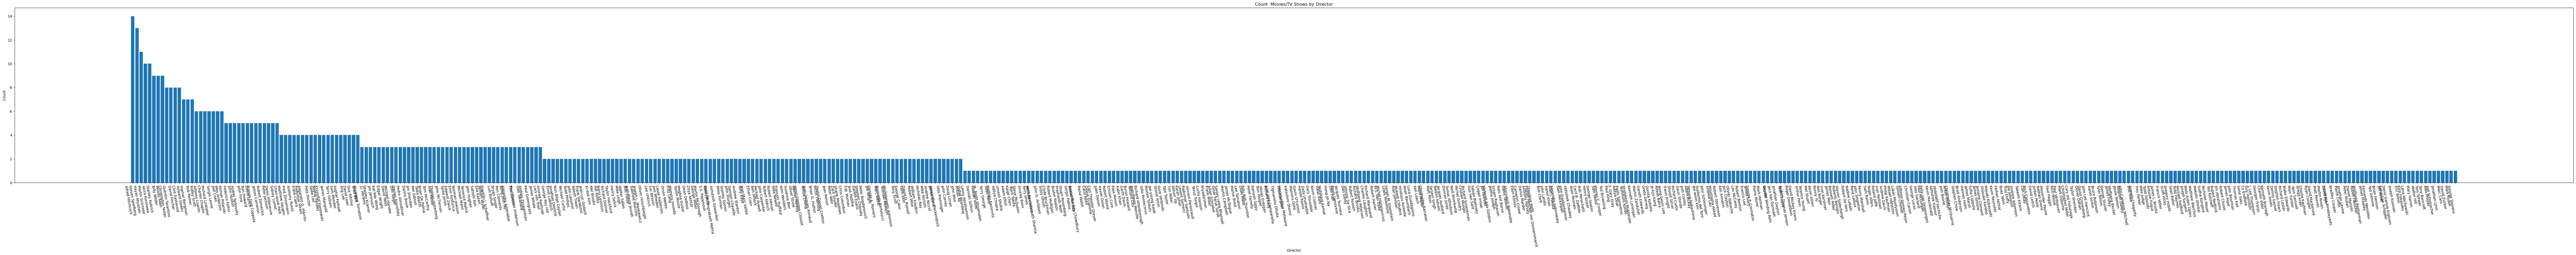

In [22]:
#Visualize the data using a bar chart to show the director with 
#the most top-rated movies/TV shows using pandas and matplotlib.
# Plot the bar chart
plt.figure(figsize=(100, 10))  # Set the figure size

plt.bar(director_counts['Director'], director_counts['Count'])  # Plot the bar chart

plt.xlabel('Director')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label

plt.title('Count  Movies/TV Shows by Director')  # Set the title
plt.xticks(rotation=1000, ha='right')  # Rotate the x-axis labels for better readability

plt.tight_layout()  # Adjust the spacing of the labels and titles
plt.show()  # Display the chart




In [23]:
#Write a report summarizing your analysis and findings,
#including any insights or observations you discovered,
#using markdown cells in the Jupyter notebook.


# Analysis Report: Popular Genres and Directors of Movies/TV Shows

# Introduction 
In this analysis, we explored a dataset containing information about movies and TV shows to identify the most popular genre and the director with the most top-rated movies/TV shows and the director with the most count off movies.

The dataset includes details such aitle, release year, genre, director, and ratings of each movie/TV show.s the t

# Popular Genre of Movies/TV Shows 

To determine the most popular genre of movies/TV shows,we used pandas to analyze the dataset.

By counting the occurrences of each genre, we identified the genre with the highest count as the most popular genre. 

The analysis revealed that  Drama is the most popular genre among the movies/TV shows in the dataset
with 85 count of movies/TV shows.

# Director with Most Average Rating Movies/TV Shows 

Next, we investigated the directors with the most Average Rating movies/TV shows in the dataset.

By grouping the data based on the directors and find mean rating for all the occurrences , 
we determined the director with the highest Average Rating.

The analysis indicated that Frank Darabont  has the most Average Rating movies/TV shows among all the directors in the dataset with avarage rate 8.95/10 .

# Director with Most count Movies/TV Shows 

then, we investigated the directors with the most count movies/TV shows in the dataset.

By grouping the data based on the directors and counting the occurrences, 
we determined the director with the highest count.

The analysis indicated that Alfred Hitchcock   has the most count movies/TV shows among all the directors in the dataset with  14 movies/TV shows directed.

# Insights and Observations 

The  Drama genre stands out as the most popular among the movies/TV shows in the dataset. 
This suggests a strong audience preference for this genre, which could indicate its commercial success and popularity in the entertainment industry.

Alfred Hitchcock has directed the highest number of movies/TV shows (14)
Frank Darabont 	has directed the  movies/TV shows with top avarage rate was (8.95)

showcasing their expertise and talent in delivering high-quality content. 

Their consistent success in producing top-rated works may make them a notable figure in the industry.
It would be interesting to further explore the relationship between the popular genre and the success of directors.

Are there specific genres that are more likely to produce top-rated movies/TV shows, or do different directors excel in different genres?

# Conclusion

Based on the analysis of the dataset, we have determined the most popular genre of movies/TV shows and identified the director with the most top-rated works.

The findings provide insights into the audience's preferences and the success of certain directors in delivering highly rated content. Further analysis can be conducted to delve deeper into the relationship between genres and directors' success, providing valuable insights for the entertainment industry.

In [24]:
End=t.time()

In [27]:
runTime= (End-Start)/60 #in min


In [28]:
runTime

0.747089421749115